#### Q1. Consider the boundary value problem:
$$
u'' = f, \quad u(0)=0, \quad u(1)=0,
$$
where
$$
f(x)=\begin{cases} 1 \quad 0.4\le x\le 0.6,\\
0 \quad \text{otherwise}.
\end{cases}
$$
- Find the exact solution of this problem.
- Solve the problem using finite difference method and check the accuracy of your solutions.

#### A1-1. Find the exact solution of this problem.
##### 1. Solve on Each Sub-interval
   
   Region l: $0 \le x < 0.4$
   $$
   u'' = 0 \quad \Rightarrow \quad u(x) = Ax + B
   $$
   Boundary condition $u(0) = 0$ gives $B = 0$.
   Thus
   $$
   u(x) = Ax
   $$

   Region ll: $0.4 \le x \le 0.6$
   $$
   u'' = 1 \quad \Rightarrow \quad u(x) = \frac{x^2}{2} + Cx + D
   $$

   Region ll: $0.6 < x \le 1$
   $$
   u'' = 0 \quad \Rightarrow \quad u(x) = Ex + F
   $$
   Boundary condition $u(1) = 0$ gives $F = -E$, so
   $$
   u(x) = E(x - 1)
   $$

##### 2. Continuity Conditions
   We match both $u$ and $u'$ at $x = 0.4$ and $x = 0.6$.
- At $x = 0.4$
   Left:
   $$
   u(0.4^-) = 0.4A, \quad u'(0.4^-) = A
   $$
   Right:
   $$
   u(0.4^+) = \frac{(0.4)^2}{2} + 0.4C + D, \quad u'(0.4^+) = 0.4 + C
   $$
   Matching:
   $$
   A = 0.4 + C, \\
   0.4A = 0.08 + 0.4C + D
   $$
- At $x = 0.6$
   Left:
   $$
   u(0.6^-) = \frac{(0.6)^2}{2} + 0.6C + D, \quad u'(0.6^+) = 0.6 + C
   $$
   Right:
   $$
   u(0.6^+) = -0.4E, \quad u'(0.6^+) = E
   $$
   Matching:
   $$
   E = 0.6 + C, \\
   0.18 + 0.6C + D = -0.4E
   $$

##### 3. Solve for Constants
   $$
   A = -0.1, \quad C = -0.5, \quad D = 0.08, \quad E = 0.1
   $$
   Thus
   $$
   F = -E =-0.1
   $$

#### Exact solution
$$
u(x) = \begin{cases}
-0.1x, & 0 \le x < 0.4,\\
\dfrac{x^2}{2} - \dfrac{x}{2} + 0.08, & 0.4 \le x \le 0.6,\\
0.1(x - 1), & 0.6 < x \le 1.
\end{cases}
$$

#### A1-2. Solve the problem using finite difference method and check the accuracy of your solutions.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def f(x: float) -> float:
    return np.where((0.4 <= x) & (x <= 0.6), 1.0, 0.0)

def exact_u(x: float) -> float:
    x = np.asarray(x)
    u = np.zeros_like(x)

    mask1 = (0 <= x) & (x < 0.4)
    mask2 = (0.4 <= x) & (x <= 0.6)
    mask3 = (0.6 < x) & (x <= 1)

    u[mask1] = -0.1 * x[mask1]
    u[mask2] = 0.5 * x[mask2]**2 - 0.5 * x[mask2] + 0.08
    u[mask3] = 0.1 * (x[mask3] - 1)

    return u

def solve_fd(n: int):
    # Grid
    h = 1.0 / n
    x = np.linspace(0.0, 1.0, n + 1)

    # Number of interior points
    m = n - 1

    # Build tridiagonal matrix A of size m x m
    # A = tridiag(-1, 2, -1)
    A = np.diag(2 * np.ones(m)) \
    + np.diag(-1 * np.ones(m-1), 1) \
    + np.diag(-1 * np.ones(m-1), -1)

    # Build RHS: b_i = -h^2 * f(x_i),  i=1,...,n-1
    b = np.zeros(m)
    for i in range(1, n):   # interior indices
        xi = x[i]
        b[i - 1] = - (h**2) * f(xi)

    # Solve A * u_inner = b
    u_inner = np.linalg.solve(A, b)

    # Add boundary values u_0 = 0, u_n = 0
    u = np.zeros(n + 1)
    u[1:n] = u_inner

    return x, u

def compute_error(n):
    x, u = solve_fd(n)
    u_ex = exact_u(x)
    err = np.max(np.abs(u - u_ex))
    h = 1.0 / n
    return err, h, x, u, u_ex

     n         h  max_error  order_p
0   20  0.050000   0.002000      NaN
1   40  0.025000   0.001000      1.0
2   80  0.012500   0.000500      1.0
3  160  0.006250   0.000250      1.0
4  320  0.003125   0.000125      1.0


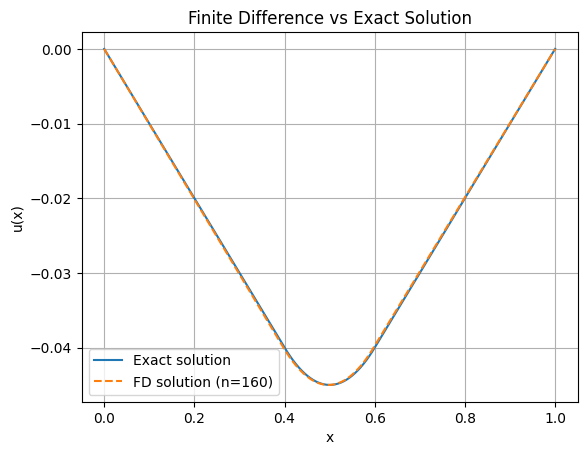

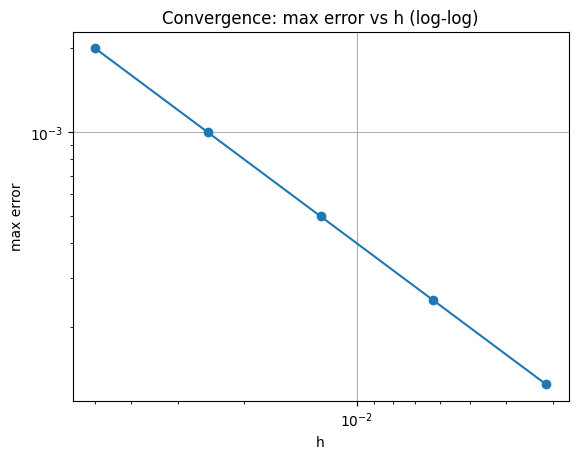

In [17]:
n_values = [20, 40, 80, 160, 320]

rows = []
prev_err = None
hs_list = []
errs_list = []

for n in n_values:
    err, h, x, u, u_ex = compute_error(n)

    # for table
    if prev_err is None:
        p = np.nan   # 第一個沒有階數
    else:
        p = np.log(prev_err / err) / np.log(2.0)

    rows.append([n, h, err, p])
    prev_err = err

    # for convergence plot
    hs_list.append(h)
    errs_list.append(err)

df = pd.DataFrame(rows, columns=["n", "h", "max_error", "order_p"])
print(df)

# ----- plot FD vs exact solution -----
n_plot = 160
_, _, x_plot, u_plot, u_ex_plot = compute_error(n_plot)

plt.figure()
plt.plot(x_plot, u_ex_plot, label="Exact solution")
plt.plot(x_plot, u_plot, "--", label=f"FD solution (n={n_plot})")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.title("Finite Difference vs Exact Solution")
plt.legend()
plt.grid(True)

# ----- plot log-log error vs h -----
plt.figure()
plt.loglog(hs_list, errs_list, marker="o")
plt.gca().invert_xaxis()  # h 由大到小，往右變細
plt.xlabel("h")
plt.ylabel("max error")
plt.title("Convergence: max error vs h (log-log)")
plt.grid(True)

plt.show()

#### Q2. Consider the boundary value problem:
$$
u'' - 2u' + u = 1, \quad u(0)=0, \quad u'(1)=1.
$$
- Show that the solution is unique by considering the homogeneous problem.
- Develop a 2nd-order finite difference method.
- Solve the problem and check the accuracy of your solutions.

#### A2-1. Show that the solution is unique by considering the homogeneous problem.
To show that the solution is unique, it suffices to show that the homogeneous problem has only the trivial solution.
$$
u'' - 2u' + u = 0, \quad u(0)=0, \quad u'(1)=0.
$$
If we can show that this problem has only $u(x)≡0$, then the original nonhomogeneous BVP must have at most one solution.

-------------

We look for solutions of the form
$$
u(x) = e^{rx}
$$
, where r is a constant to be determined. Then
$$
u'(x) = re^{rx}, \quad u''(x) = r^2e^{rx}
$$
Substituting these into homogeneous equation
$$
r^2e^{rx} - 2re^{rx} + e^{rx} = 0
$$
Since $e^{rx} \not= 0$ for all $x$, we may divide both sides by $e^{rx}$ and obtain the characteristic equation
$$
r^2 - 2r + 1 = 0
$$
This quadratic factors as
$$
(r - 1)^2 = 0
$$
so the characteristic root is a double root
$$
r = 1
$$
For a second–order linear ODE with a repeated root $r = 1$, the general solution of the homogeneoous equation is
$$
u(x) = (C_1 + C_2x)e^x
$$
, where C_1, C_2 are arbitrary costants.
We now apply the homogeneous boundary conditions
$$
u(0) = 0, \quad u'(1) = 0
$$
Then 
$$
u(0) = (C_1 + C_2 \cdot 0)e^0 = C1 =0
$$
Hence
$$
u(x) = C_2xe^x
$$
Next we compute the derivative
$$
u'(x) = C_2(e^x + xe^x)
$$
Then
$$
u'(1) = C_2(e + e) = 2C_2e = 0 \\ \Rightarrow C_2 = 0
$$
, since $e \not= 0$.
Thus $u(x) ≡ 0$ is the only solution of the homogeneous BVP.

--------------

Now suppose the oringinal nonhomogeneus BVP had two solutions $u_1$ and $u_2$.
Consider their difference $w = u_1 - u_2$. Then
$$
w'' - 2w' + w = (u_1'' - 2u_1 + u_1) - (u_2'' - 2u_2 + u_2) = 1 - 1 = 0
$$
and
$$
w(0) = u_1(0) - u_2(0) = 0, \quad w'(1) = u_1'(1) - u_2'(1) = 0
$$
So $w$ satisfies the homogeneous BVP above.
We already proved the only solution of that problem is $w ≡ 0$, hence
$$
u_1 - u_2 ≡ 0 \Rightarrow u_1 ≡ u_2
$$
Therefore, the original boundary value problem
$$
u'' - 2u' +u = 1, u(0) = 0, u'(1) = 1
$$
has a unique solution.

#### A2-2. Develop a 2nd-order finite difference method.
Let the interval $[0, 1]$ be divided into $n$equal subintervals,
$$
x_i = ih, \quad i = 0, 1, \cdots, n, \quad h = \frac{1}{n}
$$
Let
$$
u_i \approx u(x_i)
$$
denote the numerical approximation to the solution.
For interior nodes $x_i, i = 1, \cdots, n-1$, we use second-order centered differences.
$$
u''(x_i) \approx \frac{u_{i+1} - 2u_i + u_{i-1}}{h^2}, \quad 
u'(x_i) \approx \frac{u_{i+1} - u_{i-1}}{2h}
$$
Substituting these into the differential equation $u'' - 2u' + u = 1$ gives
$$
\frac{u_{i+1} - 2u_i + u_{i-1}}{h^2} - 2(\frac{u_{i+1} - u_{i-1}}{2h}) + u_i = 1
$$
Simplifying yields the finite difference equation:
$$
(\frac{1}{h^2} - \frac{1}{h})u_{i+1} + (-\frac{2}{h^2} + 1)u_i + (\frac{1}{h^2} + \frac{1}{h})u_{i-1} = 1, \quad i = 1, \cdots, n-1
$$ 
The condition $u(0) = 0$ gives $u_0 = 0$.
To approximate $u'(1) = 1$ with second-order accuracy, we use the backward difference formula:
$$
u'(1) = u'(x_n) \approx \frac{3u_n - 4u_{n-1} + u_{n-2}}{2h} = 1
$$
Then for $u = \begin{pmatrix}
u_0 \\
u_1 \\
\vdots \\
u_{n-1} \\
u_n
\end{pmatrix}$, we have

$$
A=
\begin{pmatrix}
f & g & 0 & 0 & \cdots & 0 \\
e & f & g & 0 & \cdots & 0 \\
0 & e & f & g & \cdots & 0 \\
\vdots & & \ddots & \ddots & \ddots & \vdots \\
0 & \cdots & 0 & e & f & g \\
0 & \cdots & 0 & 1 & -4 & 3
\end{pmatrix},
$$
where
$$
e = \frac{1}{h^2} + \frac{1}{h},\qquad
f = -\frac{2}{h^2} + 1,\qquad
g = \frac{1}{h^2} - \frac{1}{h}.
$$
and
$$
\mathbf{b} =
\begin{pmatrix}
1 \\
1 \\
\vdots \\
1 \\
2h
\end{pmatrix}.
$$
such that
$$
Au = \mathbf{b}
$$

#### A2-3. Solve the problem and check the accuracy of your solutions.

The homogeneous solution is
$$
u_h(x) = (C_1 + C_2x)e^x
$$
For a particular solution, we try a constant $u_p(x) = K$. Then
$$
u_p'' - 2u_p' +u_p = K = 1 \Rightarrow K = 1
$$
Hence the general solution of nonhomogeneous is
$$
u(x) = (C_1 + C_2x)e^x + 1
$$
Apply the boundary conditions:
Since $u(0) = 0$, we have
$$
u(0) = C_1e^0 + 1 = C_1 + 1 = 0 \Rightarrow C_1 = -1
$$
Then first compute
$$
u'(x) = \frac{d}{dx}[(C_1 + C_2x)e^x] = (C_2 + (-1) + C_2x)e^x
$$
so
$$
u'(1) = (2C_2 - 1)e = 1 \Rightarrow C_2 = \frac{1}{2}(1 + \frac{1}{e}) 
$$
Thus the exact solution is
$$
u(x) = (-1 + \frac{x}{2}(1 + \frac{1}{e}))e^x + 1
$$

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def u_exact(x):
    C2 = (1.0 + 1.0/np.e) / 2.0
    C1 = -1.0
    return (C1 + C2 * x) * np.exp(x) + 1.0

def solve_fd_simple(n):
    h = 1.0 / n
    x = np.linspace(0.0, 1.0, n+1)

    # unknowns: u_1,...,u_n  (size n)
    m = n

    # coefficients of interior scheme
    a = 1.0/h**2 + 1.0/h
    b = -2.0/h**2 + 1.0
    c = 1.0/h**2 - 1.0/h

    A = np.zeros((m, m))
    b_rhs = np.zeros(m)

    # first interior equation (i=1, uses u_0=0):
    # (1/h^2 - 1/h)*u_2 + (-2/h^2 + 1)*u_1 = 1
    #  => row 0: b*u_1 + c*u_2 = 1
    A[0, 0] = b
    if m > 1:
        A[0, 1] = c
    b_rhs[0] = 1.0

    # interior i=2,...,n-1
    for i in range(2, n):
        row = i - 1
        A[row, row-1] = a
        A[row, row]   = b
        A[row, row+1] = c
        b_rhs[row]    = 1.0

    # last row: Neumann at x=1
    # u_{n-2} - 4 u_{n-1} + 3 u_n = 2 h
    # indices: u_{n-2}=u_{m-2}, u_{n-1}=u_{m-1}, u_n = u_{m}
    A[m-1, m-3] = 1.0
    A[m-1, m-2] = -4.0
    A[m-1, m-1] = 3.0
    b_rhs[m-1]  = 2.0 * h

    # solve
    u_unknown = np.linalg.solve(A, b_rhs)

    # assemble full u including u_0 = 0
    u = np.zeros(n+1)
    u[1:] = u_unknown
    return x, u

     n         h  max_error   order_p
0   20  0.050000   0.001328       NaN
1   40  0.025000   0.000343  1.951566
2   80  0.012500   0.000087  1.974884
3  160  0.006250   0.000022  1.987209
4  320  0.003125   0.000006  1.993545


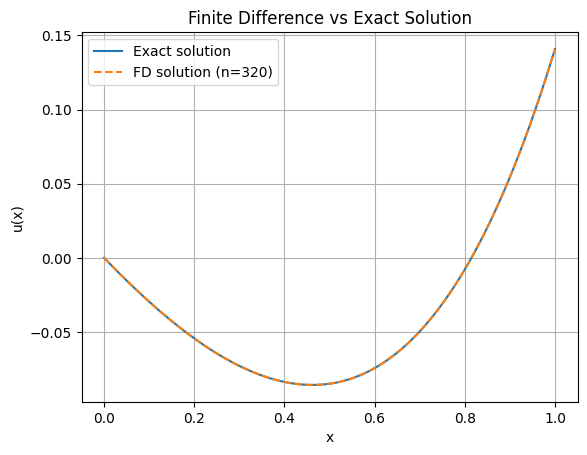

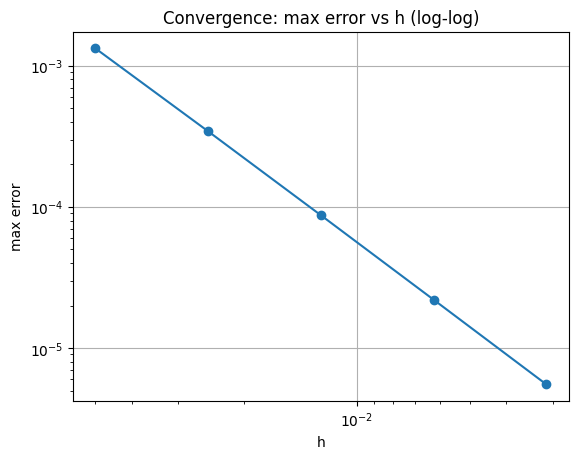

In [19]:
n_values = [20, 40, 80, 160, 320]

rows = []
prev_err = None

hs_list = []
errs_list = []

# 存一組比較細的解拿來畫 solution vs exact
x_plot = None
u_plot = None
u_ex_plot = None

for n in n_values:
    x, u_num = solve_fd_simple(n)
    u_ex = u_exact(x)

    h = 1.0 / n
    err = np.max(np.abs(u_num - u_ex))

    if prev_err is None:
        p = np.nan   # 第一個沒有收斂階數
    else:
        p = np.log(prev_err / err) / np.log(2.0)

    rows.append([n, h, err, p])
    prev_err = err

    hs_list.append(h)
    errs_list.append(err)

    # 最後一個 n (最細的網格) 拿來畫圖
    x_plot = x
    u_plot = u_num
    u_ex_plot = u_ex

df = pd.DataFrame(rows, columns=["n", "h", "max_error", "order_p"])
print(df)

# (2) Plot: numerical vs exact solution (用最細網格)
plt.figure()
plt.plot(x_plot, u_ex_plot, label="Exact solution")
plt.plot(x_plot, u_plot, "--", label=f"FD solution (n={n_values[-1]})")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.title("Finite Difference vs Exact Solution")
plt.legend()
plt.grid(True)

# (3) Plot: log-log convergence (error vs h)
plt.figure()
plt.loglog(hs_list, errs_list, marker="o")
plt.gca().invert_xaxis()  # 讓 h 由大到小，視覺上比較直覺
plt.xlabel("h")
plt.ylabel("max error")
plt.title("Convergence: max error vs h (log-log)")
plt.grid(True)

plt.show()

#### Q3. Consider the boundary value problem:
$$
u'' = sin(2\pi x), \quad u'(0) = 0, \quad u'(1) = 0
$$
- Show that the consistency condition is satisfied so that the solution of the problem exists.
- Develop a 2nd-order finite difference method.
- Solve the problem and check the accuracy of your solutions.

#### A3-1. Show that the consistency condition is satisfied so that the solution of the problem exists.
Here
$$
f(x) = sin(2\pi x), \quad \alpha = u'(0) = 0, \quad \beta = u'(1) = 0
$$
To check the consistency condition, compute the integral
$$
\int_0^1 f(x)\,dx
= \int_0^1 \sin(2\pi x)\,dx.
$$
Using the antiderivative:
$$
\int \sin(2\pi x)\,dx
= -\frac{\cos(2\pi x)}{2\pi},
$$
so
$$
\int_0^1 \sin(2\pi x)\,dx
= \left[-\frac{\cos(2\pi x)}{2\pi}\right]_{0}^{1}
= -\frac{\cos(2\pi)}{2\pi} + \frac{\cos(0)}{2\pi}.
$$
Since $cos(2\pi) = 1$ and $cos(0) = 1$,
$$
-\frac{1}{2\pi} + \frac{1}{2\pi} = 0.
$$
The boundary condition requires
$$
u'(1) - u'(0) = 0 - 0 = 0.
$$
Thus the consistency condition
$$
\int_0^1 f(x)\,dx = u'(1) - u'(0)
$$
is satisfied, so a solution exists.

#### A3-2. Develop a 2nd-order finite difference method.
Let the interval $[0, 1]$ be divided into $n$equal subintervals,
$$
x_i = ih, \quad i = 0, 1, \cdots, n, \quad h = \frac{1}{n}
$$
Let
$$
u_i \approx u(x_i)
$$
denote the numerical approximation to the solution.
For interior nodes $x_i,\ i = 1, \cdots, n-1$, we use second-order centered differences.
$$
u''(x_i) \approx \frac{u_{i+1} - 2u_i + u_{i-1}}{h^2}
$$
Substituting into $u''(x) = sin(2\pi x)$ gives, for $i = 1, \cdots, n-1$,
$$
\frac{u_{i+1} - 2u_i + u_{i-1}}{h^2} = sin(2\pi x), \quad x_i = ih
$$
We approximate the derivative at the endpoints with second–order one-sided differences.
The condition $u'(0) = 0$ and using the second–order forward difference gives 
$$
u'(0) \approx \frac{-3u_0 + 4u_1 - u_2}{2h} = 0
$$
so
$$
-3u_0 + 4u_1 - u_2 = 0
$$
The condition $u'(1) = 0$ and using the second–order bacckward difference gives 
$$
u'(1) \approx \frac{3u_n - 4u_{n-1} + u_{n-2}}{2h} = 0
$$
so
$$
3u_n - 4u_{n-1} + u_{n-2} = 0
$$

Then for $u = \begin{pmatrix}
u_0 \\
u_1 \\
\vdots \\
u_{n-1} \\
u_n
\end{pmatrix}$, we have

$$
A=
\begin{pmatrix}
-3 & 4 & -1 & 0 & \cdots & 0 \\
0 & 1 & -2 & 1 & \cdots & 0 \\
0 & 0 & 1 & -2 & \cdots & 0 \\
\vdots & & \ddots & \ddots & \ddots & \vdots \\
0 & \cdots & 0 & 0 & 1 & -2 \\
0 & \cdots & 0 & 1 & -4 & 3
\end{pmatrix},
$$
and
$$
\mathbf{b} =
\begin{pmatrix}
0 \\
sin(2\pi x_1) \\
sin(2\pi x_2) \\
\vdots \\
sin(2\pi x_{n-1}) \\
0
\end{pmatrix}.
$$
such that
$$
Au = \mathbf{b}
$$

#### A3-3. Solve the problem and check the accuracy of your solutions.

We solve
$$
u''(x)=\sin(2\pi x),\qquad u'(0)=0,\qquad u'(1)=0.
$$
Integrate once:
$$
u'(x) = \int \sin(2\pi x)\,dx
= -\frac{\cos(2\pi x)}{2\pi} + C_1 .
$$
Apply the first Neumann boundary condition $u'(0) = 0$:
$$
0 = -\frac{\cos(0)}{2\pi} + C_1
= -\frac{1}{2\pi} + C_1
\quad\Longrightarrow\quad
C_1 = \frac{1}{2\pi}.
$$
Thus
$$
u'(x)=\frac{1-\cos(2\pi x)}{2\pi}.
$$
Check the second Neumann boundary condition:
$$
u'(1)=\frac{1-\cos(2\pi)}{2\pi} = 0,
$$
so both boundary conditions are satisfied with this choice of $C_1$.
Now integrate again:
$$
u(x)=\int \frac{1-\cos(2\pi x)}{2\pi}\,dx
= \frac{x}{2\pi} - \frac{\sin(2\pi x)}{4\pi^2} + C_2.
$$
Because both boundary conditions are on $u'$, the solution is determined only up to an additive constant $C_2$. Therefore the family of exact solutions is
$$
u(x)=\frac{x}{2\pi} - \frac{\sin(2\pi x)}{4\pi^2} + C,\qquad C\in\mathbb{R}.
$$
For comparison with numerical solutions, we may take $C = 0$,
$$
u_{\text{exact}}(x)
= \frac{x}{2\pi} - \frac{\sin(2\pi x)}{4\pi^2}.
$$


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def u_exact(x: np.ndarray) -> np.ndarray:
    return x / (2.0 * np.pi) - np.sin(2.0 * np.pi * x) / (4.0 * np.pi**2)

# --------------------------------------------------
#    2nd-order FD solver for:
#    u'' = sin(2πx), u'(0)=0, u'(1)=0
#
#    Unknowns: u0,...,un  (size n+1)
#    Neumann at x=0:  (-3u0 + 4u1 - u2)/(2h) = 0
#    Interior:        (u_{i+1} - 2u_i + u_{i-1}) / h^2 = sin(2π x_i)
#    Neumann at x=1:  (3un - 4u_{n-1} + u_{n-2})/(2h) = 0
#
#    A 是奇異的（常數向量在 nullspace），所以用 lstsq 求一組解，
#    再之後用常數平移對齊 exact solution。
# --------------------------------------------------
def solve_fd_neumann(n: int):
    h = 1.0 / n
    x = np.linspace(0.0, 1.0, n + 1)
    m = n + 1

    A = np.zeros((m, m))
    b = np.zeros(m)

    # Neumann at x = 0: -3u0 + 4u1 - u2 = 0
    A[0, 0] = -3.0
    A[0, 1] = 4.0
    A[0, 2] = -1.0
    b[0] = 0.0

    # Interior points i = 1,...,n-1
    # u_{i+1} - 2u_i + u_{i-1} = h^2 sin(2π x_i)
    for i in range(1, n):
        A[i, i - 1] = 1.0
        A[i, i] = -2.0
        A[i, i + 1] = 1.0
        b[i] = (h**2) * np.sin(2.0 * np.pi * x[i])

    # Neumann at x = 1: u_{n-2} - 4u_{n-1} + 3u_n = 0
    A[n, n - 2] = 1.0
    A[n, n - 1] = -4.0
    A[n, n] = 3.0
    b[n] = 0.0

    # Solve A u = b in least-squares sense (A is singular)
    u, *_ = np.linalg.lstsq(A, b, rcond=None)

    return x, u



     n         h  max_error   order_p
0   20  0.050000   0.003207       NaN
1   40  0.025000   0.000814  1.978143
2   80  0.012500   0.000204  1.994563
3  160  0.006250   0.000051  1.998642
4  320  0.003125   0.000013  1.999661


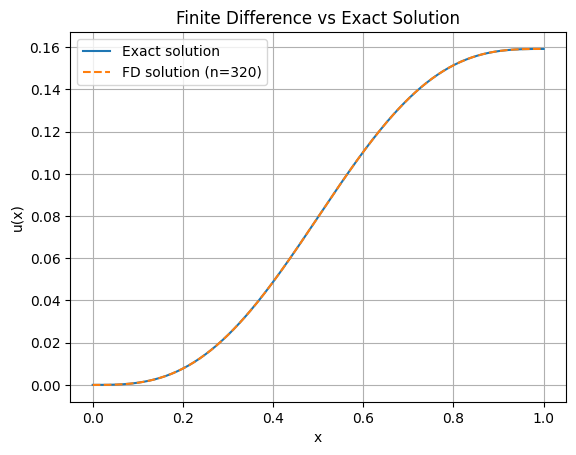

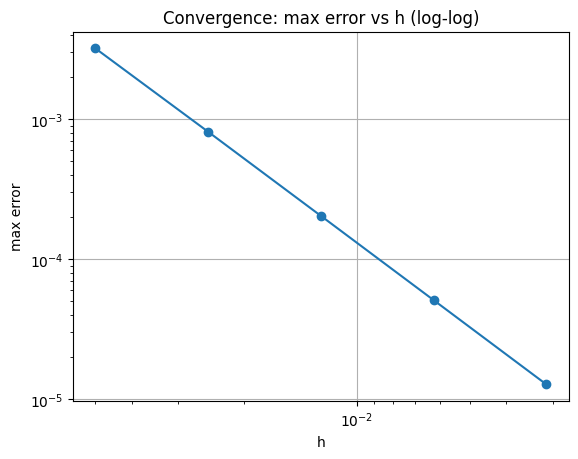

In [21]:
n_values = [20, 40, 80, 160, 320]

rows = []
hs = []
errs = []
prev_err = None

x_fine = None
u_num_fine = None
u_ex_fine = None

for n in n_values:
    x, u_num_raw = solve_fd_neumann(n)
    u_ex = u_exact(x)

    # 這個 BVP 解只差一個常數，因此先把「平均差」扣掉，
    # 將數值解和平移後的 exact solution 對齊。
    c = np.mean(u_num_raw - u_ex)
    u_num = u_num_raw - c

    # max-norm error
    err = np.max(np.abs(u_num - u_ex))
    h = 1.0 / n

    if prev_err is None:
        p = np.nan
    else:
        p = np.log(prev_err / err) / np.log(2.0)

    rows.append([n, h, err, p])
    hs.append(h)
    errs.append(err)
    prev_err = err

    # 記錄最後一組網格資料畫圖用
    x_fine = x
    u_num_fine = u_num
    u_ex_fine = u_ex

df = pd.DataFrame(rows, columns=["n", "h", "max_error", "order_p"])
print(df)

# --------- Plot 1: numerical vs exact solution ---------
plt.figure()
plt.plot(x_fine, u_ex_fine, label="Exact solution")
plt.plot(x_fine, u_num_fine, "--", label=f"FD solution (n={n_values[-1]})")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.title("Finite Difference vs Exact Solution")
plt.grid(True)
plt.legend()

# --------- Plot 2: log-log convergence plot ---------
plt.figure()
plt.loglog(hs, errs, marker="o")
plt.gca().invert_xaxis()  # h 從大到小
plt.xlabel("h")
plt.ylabel("max error")
plt.title("Convergence: max error vs h (log-log)")
plt.grid(True)

plt.show()

#### Q4. Consider the boundary value problem:
$$
u'' = e^{\sin(x)}, \quad u'(0)=0, \quad u'(1)=\alpha.
$$
- Determine $\alpha$ such that the problem has at least one solution.
- Solve the problem by finding one of its solution.

#### A4-1. Determine $\alpha$ such that the problem has at least one solution.
We consider the boundary value problem
$$
u''(x)=e^{\sin x},\qquad u'(0)=0,\qquad u'(1)=\alpha.
$$
Integrate the differential equation over $[0, 1]$:
$$
\int_0^1 u''(x)\,dx = \int_0^1 e^{\sin x}\,dx .
$$
By the Fundamental Theorem of Calculus,
$$
\int_0^1 u''(x)\,dx = u'(1) - u'(0).
$$
Using the boundary conditions $u'(0) = 0$ and $u'(1) = \alpha$,
$$
u'(1) - u'(0) = \alpha - 0 = \alpha.
$$
Therefore the consistency condition for existence of a solution is
$$
\alpha = \int_0^1 e^{\sin x}\,dx.
$$
Thus the boundary value problem admits at least one solution if and only if
$$
\displaystyle \alpha = \int_0^1 e^{\sin x}\,dx.
$$


#### A4-2. Solve the problem by finding one of its solution.
Starting from
$$
u''(x)=e^{\sin x},
$$
integrate:
$$
u'(x)=\int e^{\sin x}\,dx =: G(x)+C_1.
$$
Instead of writing $G(x)$ in elementary functions, we use a definite integral.
Applying the boundary condition $u'(0) = 0$:
$$
u'(x)=\int_{0}^{x} e^{\sin t}\,dt.
$$
Then
$$
u'(0)=\int_0^0 e^{\sin t}\,dt = 0,
\qquad
u'(1)=\int_0^1 e^{\sin t}\,dt = \alpha,
$$
which matches the consistency condition from the previous part.
Now integrate:
$$
u(x)=\int_0^x u'(s)\,ds + C
    = \int_0^x\left(\int_0^s e^{\sin t}\,dt\right)ds + C.
$$
Because both boundary conditions involve only $u'$, the solution is determined only up to a constant $C$.
We may swap the order of integration to obtain a cleaner expression:
$$
u(x)=\int_0^x (x-t)\,e^{\sin t}\,dt + C.
$$
Setting $C = 0$, we obtain one specific solution:
$$
u(x)=\int_0^x (x-t)\,e^{\sin t}\,dt.
$$
Any function of the form $u(x) + C$ is also a valid solution.


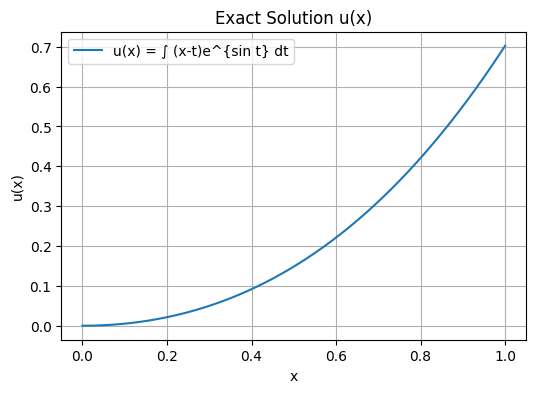

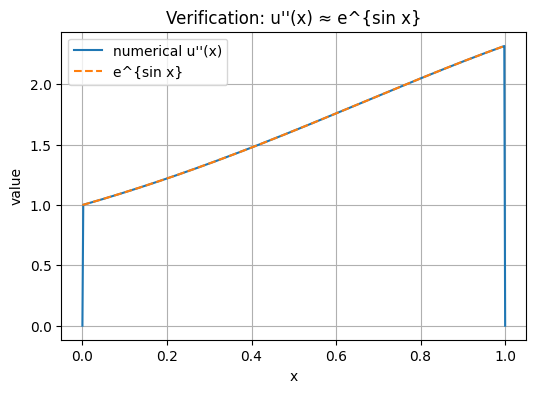

Max error in numerical u''(x): 6.901280576343538e-06


In [23]:
import numpy as np
import matplotlib.pyplot as plt

def u_exact(x):
    x = np.asarray(x)
    u = np.zeros_like(x)

    # numerical integration for each x
    for i, xi in enumerate(x):
        t = np.linspace(0, xi, 400)
        integrand = (xi - t) * np.exp(np.sin(t))
        u[i] = np.trapezoid(integrand, t)

    return u

def second_derivative(u, x):
    h = x[1] - x[0]
    u2 = np.zeros_like(u)
    # central difference
    u2[1:-1] = (u[2:] - 2*u[1:-1] + u[:-2]) / h**2
    # boundaries not used in comparison
    return u2

x = np.linspace(0, 1, 500)
u = u_exact(x)

# second derivative (approx)
u2_num = second_derivative(u, x)
u2_true = np.exp(np.sin(x))

# ---------------- Plot u(x)----------------
plt.figure(figsize=(6,4))
plt.plot(x, u, label="u(x) = ∫ (x-t)e^{sin t} dt")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.title("Exact Solution u(x)")
plt.grid(True)
plt.legend()
plt.show()

# -------------- Plot second derivative check ------------
plt.figure(figsize=(6,4))
plt.plot(x, u2_num, label="numerical u''(x)")
plt.plot(x, u2_true, '--', label="e^{sin x}")
plt.xlabel("x")
plt.ylabel("value")
plt.title("Verification: u''(x) ≈ e^{sin x}")
plt.grid(True)
plt.legend()
plt.show()

#--------------- Compute max error in u''(x) --------------
err = np.max(np.abs(u2_num[1:-1] - u2_true[1:-1]))
print("Max error in numerical u''(x):", err)


#### Q5. Consider the linear boundary value problem:
$$
\varepsilon u'' + (1 + \varepsilon)u' + u = 0, \quad u(0) = 0, \quad u(1) = 1
$$
Solve the problem and check the accuracy of your solutions.
Choose $\varepsilon = 0.01$.

Solve the characteristic equation
$$
\varepsilon r^2 + (1+\varepsilon) r + 1 = 0.
$$
For $\varepsilon=0.01$:
$$
0.01 r^2 + 1.01 r + 1 = 0
\quad\Longrightarrow\quad
r^2 + 101r + 100 = 0.
$$
Hence
$$
r_1 = -1,\qquad r_2 = -100.
$$
The general solution is
$$
u(x) = C_1 e^{-x} + C_2 e^{-100x}.
$$

Apply the boundary conditions:
- $u(0) = 0$: 
  $$
  C_1 + C_2 = 0 \Rightarrow C_2 = -C_1.
  $$
- $u(1) = 1$:  
  $$
  C_1(e^{-1} - e^{-100}) = 1.
  $$
Thus
$$
C_1 = \frac{1}{e^{-1} - e^{-100}}, \qquad
C_2 = -C_1.
$$

Final exact solution:
$$
u(x)=\frac{e^{-x} - e^{-100x}}{e^{-1} - e^{-100}}.
$$


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

eps = 0.01

def exact_u(x, eps=eps):
    x = np.asarray(x)

    # roots of ε r^2 + (1+ε) r + 1 = 0
    a = eps
    b = 1.0 + eps
    c = 1.0
    disc = b**2 - 4.0 * a * c
    r1 = (-b + np.sqrt(disc)) / (2.0 * a)
    r2 = (-b - np.sqrt(disc)) / (2.0 * a)

    # from boundary conditions:
    # C1 + C2 = 0  -> C2 = -C1
    # C1 e^{r1} + C2 e^{r2} = 1
    # => C1 (e^{r1} - e^{r2}) = 1
    C1 = 1.0 / (np.exp(r1) - np.exp(r2))
    C2 = -C1

    return C1 * np.exp(r1 * x) + C2 * np.exp(r2 * x)

def solve_fd(n, eps=eps):
    h = 1.0 / n
    x = np.linspace(0.0, 1.0, n + 1)  # grid 0..1

    m = n - 1  # number of interior unknowns
    A = np.zeros((m, m))
    b_vec = np.zeros(m)

    a = eps / h**2 - (1.0 + eps) / (2.0 * h)
    b = -2.0 * eps / h**2 + 1.0
    c = eps / h**2 + (1.0 + eps) / (2.0 * h)

    # i = 1  (first interior node x_1)
    # b * u_1 + c * u_2 + a * u_0 = 0, but u_0 = 0 => RHS = 0
    if m >= 1:
        A[0, 0] = b
        if m > 1:
            A[0, 1] = c
        b_vec[0] = 0.0

    # i = 2,...,n-2 (middle interior nodes)
    for i in range(2, n - 1):
        row = i - 1       # row index in A, 0-based
        A[row, row - 1] = a
        A[row, row] = b
        A[row, row + 1] = c
        b_vec[row] = 0.0

    # i = n-1  (last interior node)
    # a u_{n-2} + b u_{n-1} + c u_n = 0  (u_n = 1)
    if m >= 2:
        A[m - 1, m - 2] = a
    A[m - 1, m - 1] = b
    b_vec[m - 1] = -c * 1.0  # move c*u_n to RHS

    # solve for interior values
    u_inner = np.linalg.solve(A, b_vec)

    # assemble full solution (including boundaries)
    u = np.zeros(n + 1)
    u[0] = 0.0     # left BC
    u[1:n] = u_inner
    u[n] = 1.0     # right BC

    return x, u

     n         h  max_error   order_p
0   20  0.050000   1.253020       NaN
1   40  0.025000   0.546187  1.197944
2   80  0.012500   0.156541  1.802856
3  160  0.006250   0.033975  2.203978
4  320  0.003125   0.008458  2.006033
5  640  0.001563   0.002097  2.012052


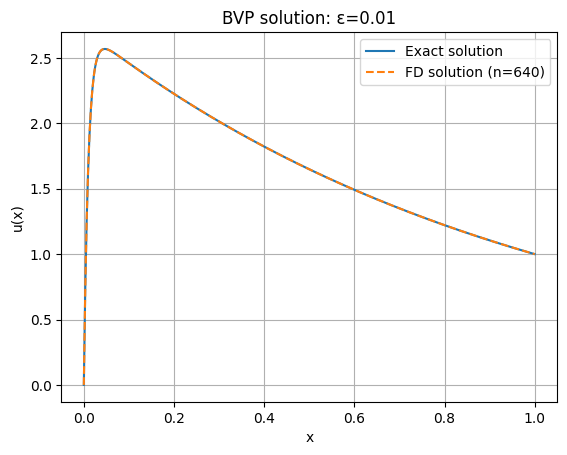

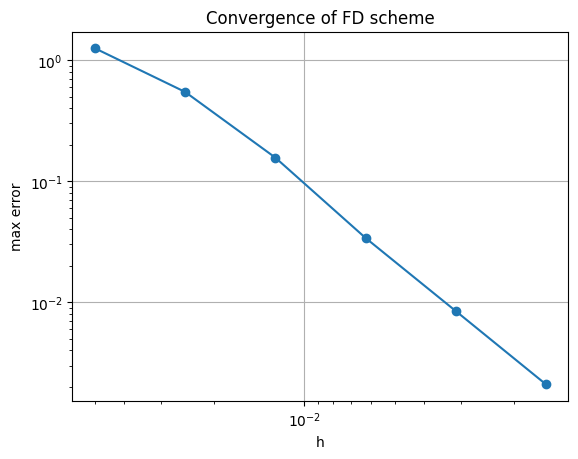

In [25]:
n_values = [20, 40, 80, 160, 320, 640]

rows = []
hs = []
errs = []
prev_err = None

x_plot = None
u_plot = None
u_ex_plot = None

for n in n_values:
    x, u_num = solve_fd(n, eps=eps)
    u_ex = exact_u(x, eps=eps)

    h = 1.0 / n
    err = np.max(np.abs(u_num - u_ex))

    if prev_err is None:
        p = np.nan   # no order for first row
    else:
        p = np.log(prev_err / err) / np.log(2.0)

    rows.append([n, h, err, p])
    hs.append(h)
    errs.append(err)
    prev_err = err

    # Save finest grid for plotting solution
    x_plot = x
    u_plot = u_num
    u_ex_plot = u_ex

# ---- pandas table ----
df = pd.DataFrame(rows, columns=["n", "h", "max_error", "order_p"])
print(df)

# ---- Plot 1: FD vs exact solution (finest grid) ----
plt.figure()
plt.plot(x_plot, u_ex_plot, label="Exact solution")
plt.plot(x_plot, u_plot, "--", label=f"FD solution (n={n_values[-1]})")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.title("BVP solution: ε=0.01")
plt.grid(True)
plt.legend()

# ---- Plot 2: log-log convergence ----
plt.figure()
plt.loglog(hs, errs, marker="o")
plt.gca().invert_xaxis()  # h from large to small
plt.xlabel("h")
plt.ylabel("max error")
plt.title("Convergence of FD scheme")
plt.grid(True)

plt.show()